## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")

In [4]:
missing_rate = df_train.isnull().sum() / len(df_train)
missing_rate

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
index = df_train.isnull()
df_train[index.values == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 觀察 Age

29.69911764705882
14.526497332334044


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


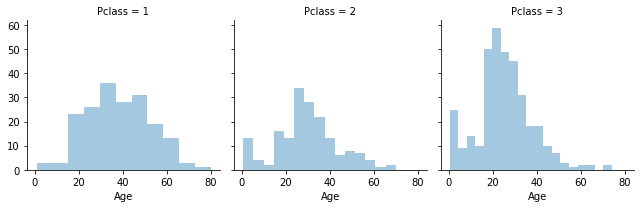

In [17]:
print(df_train["Age"].mean())
print(df_train["Age"].std())

g = sns.FacetGrid(df_train, col="Pclass")
g.map(sns.distplot, 'Age', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


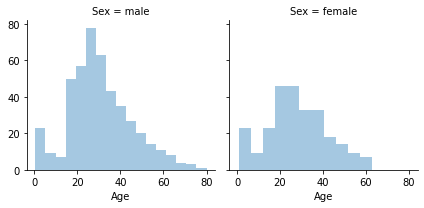

In [18]:
g = sns.FacetGrid(df_train, col="Sex")
g.map(sns.distplot, 'Age', kde=False)

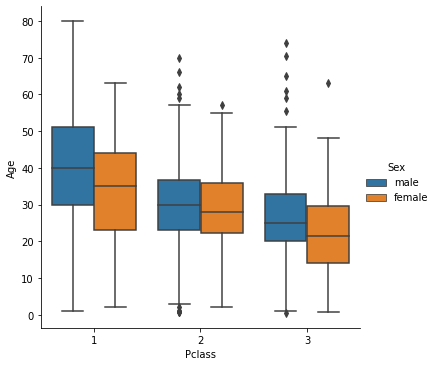

In [21]:
g = sns.catplot(x="Pclass", y="Age", hue="Sex", data=df_train, kind="box")

## 補值

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])

data = df_train[['Sex', 'Pclass', 'Age']]

In [24]:
from sklearn.impute import KNNImputer
neighbors = 1

imputer = KNNImputer(n_neighbors=neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(data))

In [28]:
display(data[index.values == True])
display(df_filled[index.values == True])

,Sex,Pclass,Age
0,1,3,22.0
2,0,3,26.0
4,1,3,35.0
5,1,3,NaN
5,1,3,NaN
...,...,...,...
885,0,3,39.0
886,1,2,27.0
888,0,3,NaN
888,0,3,NaN


,0,1,2
0,1.0,3.0,22.0
2,0.0,3.0,26.0
4,1.0,3.0,35.0
5,1.0,3.0,22.0
5,1.0,3.0,22.0
...,...,...,...
885,0.0,3.0,39.0
886,1.0,2.0,27.0
888,0.0,3.0,26.0
888,0.0,3.0,26.0
